# SM GWP 3
Group Number : 5657 \
Group members \
> Bharat Swami\
> WYCLIFFE KIPKOECH CHERUIYOT \
> CHRIS ENNY OFIKWU


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

## **Step2**
**`This Step is in PDF document (Report)`**

## **Step3**

In [39]:
# 15 financial companies
List1 = ["JPM", "WFC", "BAC", "C", "GS",
        "USB", "MS", "KEY", "PNC", "COF",
        "AXP", "PRU", "SCHW", "BCS", "HSBC"]

In [40]:
# 15 non-financial companies
List2 = ["KR", "PFE", "XOM", "WMT", "DAL",
        "CSCO", "BBY", "EQIX", "DUK", "NFLX",
        "GE", "APA", "F", "REGN", "CMS"]

In [41]:
data1 = yf.download(List1, start="2008-09-01", end="2008-10-31")["Adj Close"]
data2 = yf.download(List2, start="2008-09-01", end="2008-10-31")["Adj Close"]
df = pd.concat([data1, data2], axis=1)
df_returns = df.pct_change().dropna()


colname=df.columns
YData = df.reset_index().iloc[:, 1:].to_numpy()
YData_dates = pd.to_datetime(df.reset_index()["Date"], format="%Y-%m-%d")
print(colname)

[*********************100%%**********************]  15 of 15 completed
[*********************100%%**********************]  15 of 15 completed


Index(['AXP', 'BAC', 'BCS', 'C', 'COF', 'GS', 'HSBC', 'JPM', 'KEY', 'MS',
       'PNC', 'PRU', 'SCHW', 'USB', 'WFC', 'APA', 'BBY', 'CMS', 'CSCO', 'DAL',
       'DUK', 'EQIX', 'F', 'GE', 'KR', 'NFLX', 'PFE', 'REGN', 'WMT', 'XOM'],
      dtype='object', name='Ticker')


In [42]:
#df_returns.cumsum()

<Figure size 1000x800 with 0 Axes>

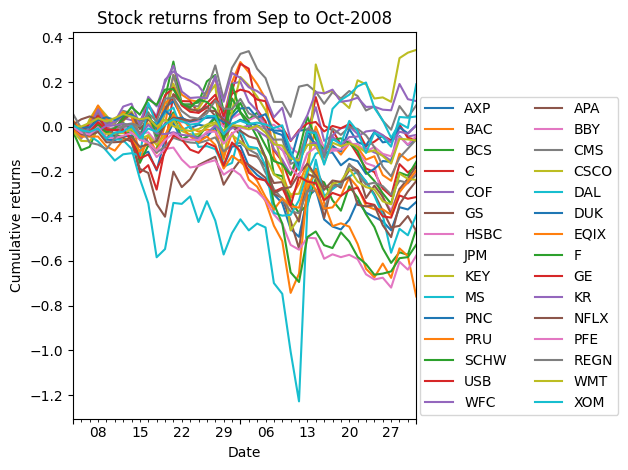

In [43]:
plt.figure(figsize=(10, 8))
df_returns.cumsum().plot()
plt.title("Stock returns from Sep to Oct-2008")
plt.xlabel("Date")
plt.ylabel("Cumulative returns")
plt.xticks(visible=False)
plt.legend(loc=(1.01, 0.01), ncol=2)
plt.tight_layout();

## **Step4**

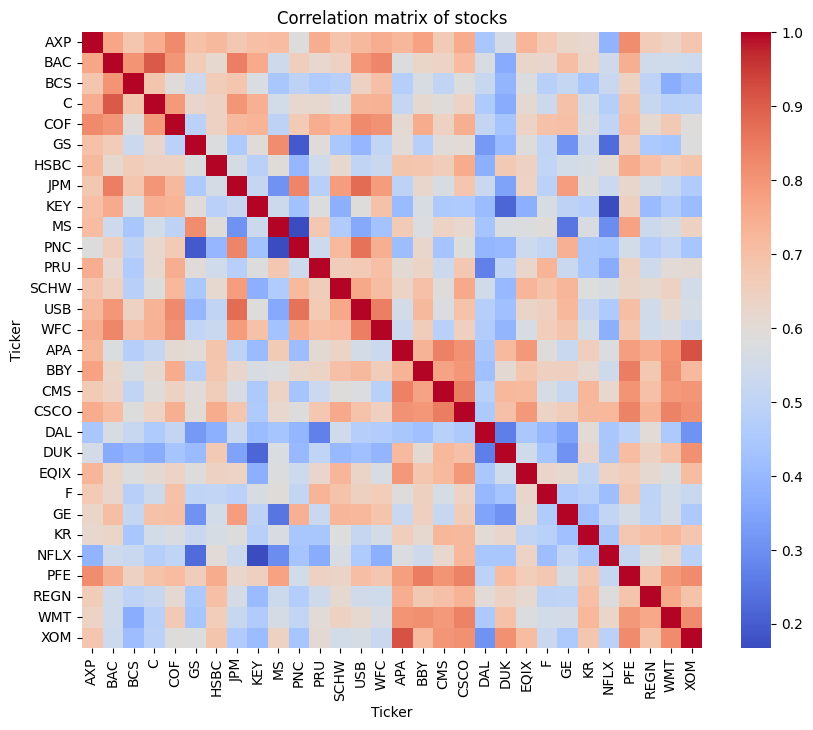

In [44]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_returns.corr(), cmap="coolwarm")
plt.title("Correlation matrix of stocks");

In [45]:
plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(df_returns.corr()))
heatmap = sns.heatmap(df_returns.corr(), mask=mask, vmin=-1, vmax=1, cmap='coolwarm', annot=False)
heatmap.set_title("Correlation Heatmap", fontdict={"fontsize":12}, pad=12);

In [46]:
plt.figure(figsize=(10, 8))
sns.clustermap(df_returns.corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap", fontdict={"fontsize":12}, pad=12)
plt.tight_layout()

<Figure size 1000x800 with 0 Axes>

## **Step5**

Note: there are no deliverables required for this
step.

## **Step6**

## a
**Pseudocode for the Upper Confidence Bound (UCB) Algorithm:**

This step is implemented in the pdf document

In [47]:
import numpy as np
import pandas as pd
import yfinance as yf

# Financial data: 15 financial companies and 15 non-financial companies
financial_companies = ["JPM", "WFC", "BAC", "C", "GS", "USB", "MS", "KEY", "PNC", "COF",
                       "AXP", "PRU", "SCHW", "BCS", "HSBC"]
non_financial_companies = ["KR", "PFE", "XOM", "WMT", "DAL", "CSCO", "BBY", "EQIX", "DUK", "NFLX",
                           "GE", "APA", "F", "REGN", "CMS"]

# Download adjusted close prices for the specified companies
data1 = yf.download(financial_companies, start="2008-09-01", end="2008-10-31")["Adj Close"]
data2 = yf.download(non_financial_companies, start="2008-09-01", end="2008-10-31")["Adj Close"]

# Combine financial and non-financial data
df = pd.concat([data1, data2], axis=1)
df = df.pct_change().dropna()

# Initialize parameters
nactions = len(df.columns)  # Number of available actions (companies)
qvalue = np.zeros(nactions)  # Estimated value of each action
n_visits = np.zeros(nactions)  # Visit count for each action
c = 2.0  # Exploration parameter

# Main loop (simulate T trials)
T = len(df)
for t in range(T):
    # Calculate UCB for each action
    ucb_values = qvalue + c * np.sqrt(np.log(t + 1) / (n_visits + 1))

    # Select the action with the highest UCB
    selected_action = np.argmax(ucb_values)

    # Simulate reward (use daily return as reward)
    reward = df.iloc[t, selected_action]

    # Update estimated value of the selected action
    n_visits[selected_action] += 1
    qvalue[selected_action] += (reward - qvalue[selected_action]) / n_visits[selected_action]

# Portfolio consists of assets with highest estimated values
print()
selected_assets = [df.columns[i] for i in np.argsort(qvalue)[::-1]]
print("Selected assets (highest estimated values):", selected_assets)


[*********************100%%**********************]  15 of 15 completed
[*********************100%%**********************]  15 of 15 completed



Selected assets (highest estimated values): ['WMT', 'BCS', 'AXP', 'SCHW', 'BBY', 'NFLX', 'CMS', 'C', 'PRU', 'APA', 'XOM', 'GE', 'HSBC', 'JPM', 'REGN', 'DUK', 'GS', 'KR', 'WFC', 'EQIX', 'DAL', 'PNC', 'COF', 'F', 'BAC', 'KEY', 'USB', 'CSCO', 'PFE', 'MS']


In this implementation, the `ucb_action` function calculates the Upper Confidence Bound values for each action and selects the action with the highest UCB value.

The `reward_update` function updates the estimated value of the chosen action and maintains a count of how many times each action has been visited.

In [48]:
def ucb_action(qvalue, n_visits, c):
    """
    Determines the action to take using the Upper Confidence Bound (UCB) algorithm.
    """
    ucb_values = qvalue + c * np.sqrt(np.log(np.sum(n_visits)) / (n_visits))
    action = np.argmax(ucb_values)
    return action

def reward_update(action, reward, qvalue_old, alpha):
    qvalue_new = qvalue_old.copy()

    qvalue_new[action] = qvalue_old[action] + alpha * (reward - qvalue_old[action])

    return qvalue_new


In [49]:
NK = YData.shape[1]
EPSILON = 0.1
ALPHA = 0.85
NEPISODES = 1000
HOLD = 1
TMAX = YData.shape[0] - HOLD

UCB_weight = np.sqrt(2)
np.random.seed(1234)

reward_avg = np.zeros((TMAX))
optimal_avg = np.zeros((TMAX))

reward_queue = np.zeros((HOLD, 2))

for run in range(NEPISODES):
    # Initialize q function and actions record
    qvalue = np.zeros((NK))
    qvalue_up = np.zeros((NK))
    nactions = np.zeros((NK))
    for tt in range(TMAX):
        aa_opt = ucb_action(qvalue, n_visits=NK, c=UCB_weight)
        nactions[aa_opt] += 1
        # Compute reward as return over holding period
        reward_queue[HOLD - 1, 0] = (
            YData[tt + HOLD, aa_opt] - YData[tt, aa_opt]
        ) / (YData[tt, aa_opt])
        reward_queue[HOLD - 1, 1] = aa_opt
        # Update Q function using action chosen HOLD days before
        qvalue = reward_update(
            int(reward_queue[0, 1]), reward_queue[0, 0], qvalue, ALPHA
        )
        # Upper-confidence adjustment
        qvalue_up = np.zeros((NK))
        for aa in range(NK):
            if nactions[aa] == 0:
                qvalue_up[aa] = np.max(qvalue) + 1.0
            else:
                qvalue_up[aa] = qvalue[aa] + np.sqrt(np.log(tt + 1) / nactions[aa])
        reward_queue[0 : HOLD - 1, :] = reward_queue[1:HOLD, :]
        reward_avg[tt] += reward_queue[HOLD - 1, 0] / NEPISODES
        optimal_avg[tt] += (
            aa_opt == np.argmax((YData[tt + HOLD, :] - YData[tt, :]) / YData[tt, :])
        ) / NEPISODES


In [50]:
plt.plot(YData_dates[HOLD : YData.shape[0]], optimal_avg)
plt.title("Frequency of optimal action", fontsize="x-large")

fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

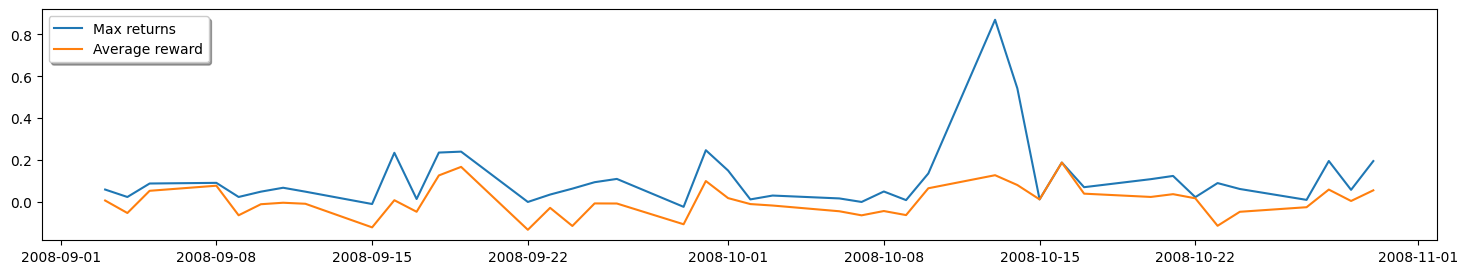

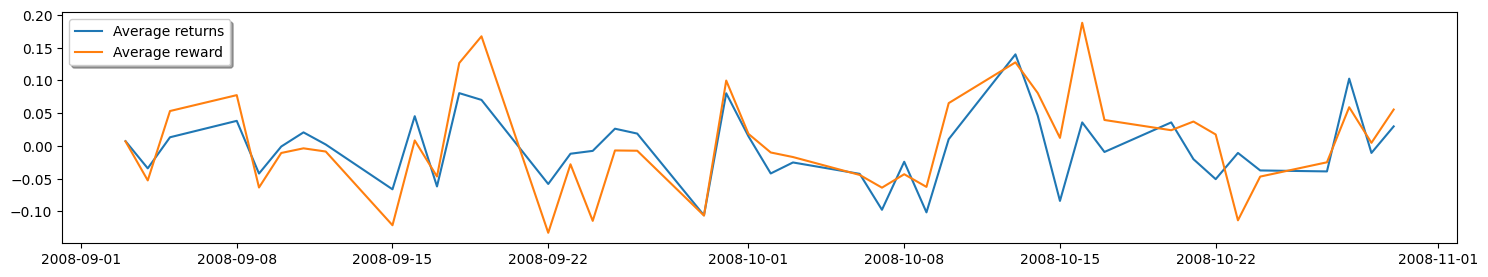

In [51]:

plt.plot(
    YData_dates[HOLD : YData.shape[0]],
    np.max(
        (YData[HOLD : YData.shape[0], :] - YData[0:TMAX, :]) / (YData[0:TMAX, :]), axis=1
    ),
    label="Max returns",
)
plt.plot(
    YData_dates[HOLD : YData.shape[0]], reward_avg, label="Average reward"
)
legend = plt.legend(loc="upper left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

plt.plot(
    YData_dates[HOLD : YData.shape[0]],
    np.mean(
        (YData[HOLD : YData.shape[0], :] - YData[0:TMAX, :]) / (YData[0:TMAX, :]), axis=1
    ),
    label="Average returns",
)
plt.plot(
    YData_dates[HOLD : YData.shape[0]], reward_avg, label="Average reward"
)
legend = plt.legend(loc="upper left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3);

In [52]:
print(np.mean(optimal_avg))
# Average annualized return from holding the equally-weighted portfolio
print(
    (
        1
        + np.mean(
            (YData[HOLD : YData.shape[0], :] - YData[0:TMAX, :]) / (YData[0:TMAX, :])
        )
    )
    ** (250 / HOLD)
    - 1,
    np.sqrt(250 / HOLD)
    * np.std(
        np.mean(
            (YData[HOLD : YData.shape[0], :] - YData[0:TMAX, :]) / (YData[0:TMAX, :]),
            axis=1,
        )
    ),
)
# Average annualized return from holding the Bandit portfolio
print(
    (1 + np.mean(reward_avg)) ** (250 / HOLD) - 1,
    np.sqrt(250 / HOLD) * np.std(reward_avg),
)

0.04761904761904765
-0.6336212660026618 0.8543646123826162
1.2768441229665743 1.1727219469969383


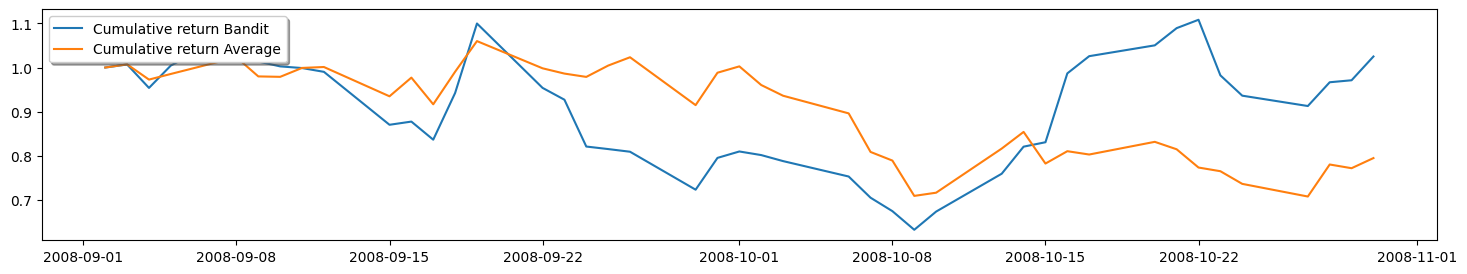

In [53]:
return_cumulative = np.zeros((TMAX + 1, 2))
return_cumulative[0, 0] = 1
return_cumulative[0, 1] = 1
for tt in range(1, TMAX + 1):
    return_cumulative[tt, 0] = return_cumulative[tt - 1, 0] * (1 + reward_avg[tt - 1])
    rmean = np.mean(
        (YData[tt + HOLD - 1, :] - YData[tt - 1, :]) / (YData[tt - 1, :])
    )
    return_cumulative[tt, 1] = return_cumulative[tt - 1, 1] * (1 + rmean)

plt.plot(
    YData_dates[HOLD - 1 : YData.shape[0]],
    return_cumulative[:, 0],
    label="Cumulative return Bandit",
)
plt.plot(
    YData_dates[HOLD - 1 : YData.shape[0]],
    return_cumulative[:, 1],
    label="Cumulative return Average",
)
legend = plt.legend(loc="upper left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3);

In [54]:
import numpy as np

def ucb_action(q_values, n_visits, c):
    """
    Determines the action to take using the Upper Confidence Bound (UCB) algorithm.
    """
    ucb_values = q_values + c * np.sqrt(np.log(np.sum(n_visits)) / (n_visits + 1e-6))
    action = np.argmax(ucb_values)
    return action

def reward_update(action, reward, qvalue_old, n_visits):
    """
    Updates the estimated value of the action and the number of times it has been visited.
    """
    n_visits[action] += 1
    qvalue_new = qvalue_old.copy()
    qvalue_new[action] += (reward - qvalue_old[action]) / n_visits[action]
    return qvalue_new, n_visits

# Initialize q-values and visit counts
n_actions = len(df.columns)
q_values = np.zeros(n_actions)
n_visits = np.zeros(n_actions)

# UCB parameters
c = 2

# Apply UCB algorithm to select assets
selected_assets_ucb = []
for t in range(len(df)):
    action = ucb_action(q_values, n_visits, c)
    reward = df.iloc[t, action]
    q_values, n_visits = reward_update(action, reward, q_values, n_visits)
    selected_assets_ucb.append(df.columns[action])

print(selected_assets_ucb)


['AXP', 'AXP', 'BAC', 'BCS', 'C', 'COF', 'GS', 'HSBC', 'JPM', 'KEY', 'MS', 'PNC', 'PRU', 'SCHW', 'USB', 'WFC', 'APA', 'BBY', 'CMS', 'CSCO', 'DAL', 'DUK', 'EQIX', 'F', 'GE', 'KR', 'NFLX', 'PFE', 'REGN', 'WMT', 'XOM', 'DAL', 'REGN', 'PNC', 'BCS', 'BAC', 'CSCO', 'PRU', 'KEY', 'APA', 'BBY', 'NFLX']


## **Step7**

Note: there are no deliverables required for this step.

## **Step8**

## a
pseudocode that describes the epsilon-greedy algorithm is found in the pdf doc

## b

In [55]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import rand, seed

In [56]:
def optimal_action(qvalue, eps):
    """
    Determines what is the action to take given a measure of past
    expected rewards across actions. With probability eps the action
    is not the greedy one
    """
    nactions = qvalue.shape[0]
    action_hat = np.where(qvalue == np.max(qvalue))

    if rand() <= eps:
        randnum = rand()
        for aa in range(nactions):
            if randnum < (aa + 1) / nactions:
                break
    elif action_hat[0].shape[0] > 1:
        # Randomize action when ties
        randnum = rand()
        for aa in range(action_hat[0].shape[0]):
            if randnum < (aa + 1) / action_hat[0].shape[0]:
                break
        aa = action_hat[0][aa]
    else:
        aa = np.argmax(qvalue)

    return aa

def reward_update(action, reward, qvalue_old, alpha):
    qvalue_new = qvalue_old.copy()

    qvalue_new[action] = qvalue_old[action] + alpha * (reward - qvalue_old[action])

    return qvalue_new

## c

In [57]:
def optimal_action(qvalue, eps):
    """
    Determines what is the action to take given a measure of past
    expected rewards across actions. With probability eps the action
    is not the greedy one
    """
    nactions = qvalue.shape[0]
    action_hat = np.where(qvalue == np.max(qvalue))

    if np.random.rand() <= eps:
        randnum = np.random.rand()
        for aa in range(nactions):
            if randnum < (aa + 1) / nactions:
                break
    elif action_hat[0].shape[0] > 1:
        # Randomize action when ties
        randnum = np.random.rand()
        for aa in range(action_hat[0].shape[0]):
            if randnum < (aa + 1) / action_hat[0].shape[0]:
                break
        aa = action_hat[0][aa]
    else:
        aa = np.argmax(qvalue)

    return aa


def reward_update(action, reward, qvalue_old, alpha):
    qvalue_new = qvalue_old.copy()
    qvalue_new[action] = qvalue_old[action] + alpha * (reward - qvalue_old[action])

    return qvalue_new

In [58]:
NK = YData.shape[1]
EPSILON = 0.1
ALPHA = 0.85
NEPISODES = 1000
HOLD = 1
TMAX = YData.shape[0] - HOLD

np.random.seed(1234)

reward_avg = np.zeros((TMAX))
optimal_avg = np.zeros((TMAX))

reward_queue = np.zeros((HOLD, 2))

for run in range(NEPISODES):
    # Initialize q function and actions record
    qvalue = np.zeros((NK))
    qvalue_up = np.zeros((NK))
    nactions = np.zeros((NK))
    for tt in range(TMAX):
        aa_opt = optimal_action(qvalue_up, EPSILON)
        nactions[aa_opt] += 1
        # Compute reward as return over holding period
        reward_queue[HOLD - 1, 0] = (
            YData[tt + HOLD, aa_opt] - YData[tt, aa_opt]
        ) / (YData[tt, aa_opt])
        reward_queue[HOLD - 1, 1] = aa_opt
        # Update Q function using action chosen HOLD days before
        qvalue = reward_update(
            int(reward_queue[0, 1]), reward_queue[0, 0], qvalue, ALPHA
        )
        # Upper-confidence adjustment
        qvalue_up = np.zeros((NK))
        for aa in range(NK):
            if nactions[aa] == 0:
                qvalue_up[aa] = np.max(qvalue) + 1.0
            else:
                qvalue_up[aa] = qvalue[aa] + np.sqrt(np.log(tt + 1) / nactions[aa])
        reward_queue[0 : HOLD - 1, :] = reward_queue[1:HOLD, :]
        # print(reward_queue[HOLD - 1, 0])
        reward_avg[tt] += reward_queue[HOLD - 1, 0] / NEPISODES
        optimal_avg[tt] += (
            aa_opt == np.argmax((YData[tt + HOLD, :] - YData[tt, :]) / YData[tt, :])
        ) / NEPISODES


In [59]:
plt.plot(YData_dates[HOLD : YData.shape[0]], optimal_avg)
plt.title("Frequency of optimal action", fontsize="x-large")

fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

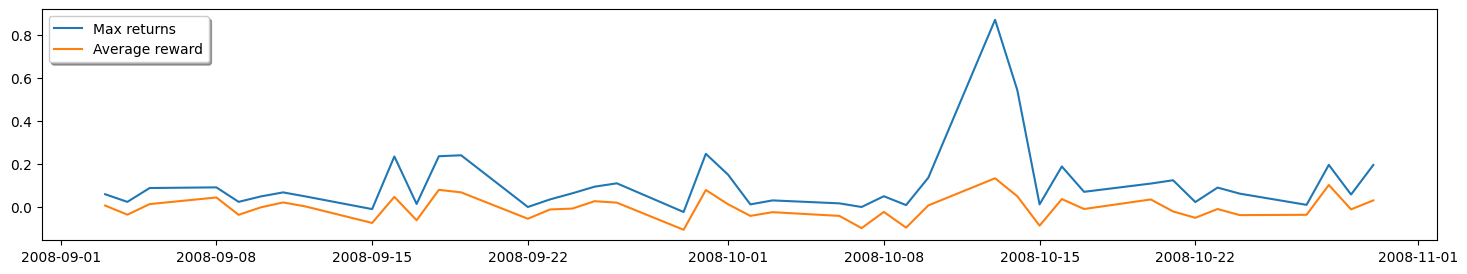

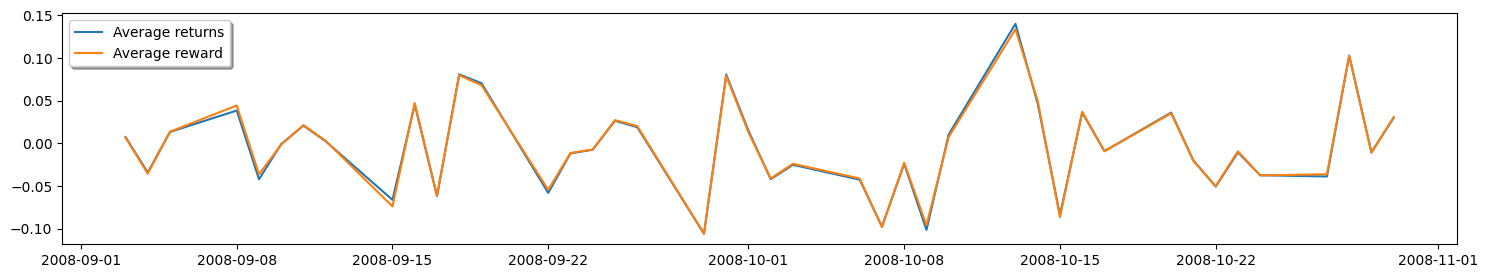

In [60]:

plt.plot(
    YData_dates[HOLD : YData.shape[0]],
    np.max(
        (YData[HOLD : YData.shape[0], :] - YData[0:TMAX, :]) / (YData[0:TMAX, :]), axis=1
    ),
    label="Max returns",
)
plt.plot(
    YData_dates[HOLD : YData.shape[0]], reward_avg, label="Average reward"
)
legend = plt.legend(loc="upper left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

plt.plot(
    YData_dates[HOLD : YData.shape[0]],
    np.mean(
        (YData[HOLD : YData.shape[0], :] - YData[0:TMAX, :]) / (YData[0:TMAX, :]), axis=1
    ),
    label="Average returns",
)
plt.plot(
    YData_dates[HOLD : YData.shape[0]], reward_avg, label="Average reward"
)
legend = plt.legend(loc="upper left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3);

In [61]:
print(np.mean(optimal_avg))
# Average annualized return from holding the equally-weighted portfolio
print(
    (
        1
        + np.mean(
            (YData[HOLD : YData.shape[0], :] - YData[0:TMAX, :]) / (YData[0:TMAX, :])
        )
    )
    ** (250 / HOLD)
    - 1,
    np.sqrt(250 / HOLD)
    * np.std(
        np.mean(
            (YData[HOLD : YData.shape[0], :] - YData[0:TMAX, :]) / (YData[0:TMAX, :]),
            axis=1,
        )
    ),
)
# Average annualized return from holding the Bandit portfolio
print(
    (1 + np.mean(reward_avg)) ** (250 / HOLD) - 1,
    np.sqrt(250 / HOLD) * np.std(reward_avg),
)

0.03395238095238098
-0.6336212660026618 0.8543646123826162
-0.6112335438290358 0.8459269048377281


In [62]:
return_cumulative = np.zeros((TMAX + 1, 2))
return_cumulative[0, 0] = 1
return_cumulative[0, 1] = 1
for tt in range(1, TMAX + 1):
    return_cumulative[tt, 0] = return_cumulative[tt - 1, 0] * (1 + reward_avg[tt - 1])
    rmean = np.mean(
        (YData[tt + HOLD - 1, :] - YData[tt - 1, :]) / (YData[tt - 1, :])
    )
    return_cumulative[tt, 1] = return_cumulative[tt - 1, 1] * (1 + rmean)

plt.plot(
    YData_dates[HOLD - 1 : YData.shape[0]],
    return_cumulative[:, 0],
    label="Cumulative return Bandit",
)
plt.plot(
    YData_dates[HOLD - 1 : YData.shape[0]],
    return_cumulative[:, 1],
    label="Cumulative return Average",
)
legend = plt.legend(loc="upper left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3);

In [63]:
import numpy as np
import pandas as pd
import yfinance as yf

# Financial data: 15 financial companies and 15 non-financial companies
financial_companies = ["JPM", "WFC", "BAC", "C", "GS", "USB", "MS", "KEY", "PNC", "COF",
                       "AXP", "PRU", "SCHW", "BCS", "HSBC"]
non_financial_companies = ["KR", "PFE", "XOM", "WMT", "DAL", "CSCO", "BBY", "EQIX", "DUK", "NFLX",
                           "GE", "APA", "F", "REGN", "CMS"]

# Download adjusted close prices for the specified companies
data1 = yf.download(financial_companies, start="2008-09-01", end="2008-10-31")["Adj Close"]
data2 = yf.download(non_financial_companies, start="2008-09-01", end="2008-10-31")["Adj Close"]

# Combine financial and non-financial data
df = pd.concat([data1, data2], axis=1)
df = df.pct_change().dropna()

# Epsilon-greedy algorithm
def epsilon_greedy(qvalue, eps, nactions):
    randnum = np.random.rand()
    if randnum <= eps:
        # Exploration: Randomly select an action
        action = np.random.choice(nactions)
    else:
        # Exploitation: Choose the action with the maximum estimated value
        action = np.argmax(qvalue)
    return action

# Initialize parameters
nactions = len(df.columns)  # Number of available actions (companies)
qvalue = np.zeros(nactions)  # Estimated value of each action
eps = 0.1  # Exploration-exploitation trade-off parameter

# Main loop (simulate T trials)
T = len(df)
for t in range(T):
    # Select an action using epsilon-greedy strategy
    selected_action = epsilon_greedy(qvalue, eps, nactions)

    # Simulate reward (use daily return as reward)
    reward = df.iloc[t, selected_action]

    # Update estimated value of the selected action (using a simple average update)
    alpha = 0.1  # Learning rate
    qvalue[selected_action] = qvalue[selected_action] + alpha * (reward - qvalue[selected_action])

# Portfolio consists of assets with highest estimated values
selected_assets = [df.columns[i] for i in np.argsort(qvalue)[::-1]]
print("Selected assets (highest estimated values):", selected_assets)

[*********************100%%**********************]  15 of 15 completed
[*********************100%%**********************]  15 of 15 completed


Selected assets (highest estimated values): ['PNC', 'XOM', 'CSCO', 'PRU', 'SCHW', 'USB', 'WMT', 'APA', 'BBY', 'CMS', 'WFC', 'DAL', 'EQIX', 'F', 'GE', 'KR', 'NFLX', 'PFE', 'REGN', 'DUK', 'JPM', 'MS', 'HSBC', 'AXP', 'C', 'COF', 'GS', 'KEY', 'BCS', 'BAC']


# **Step 9**

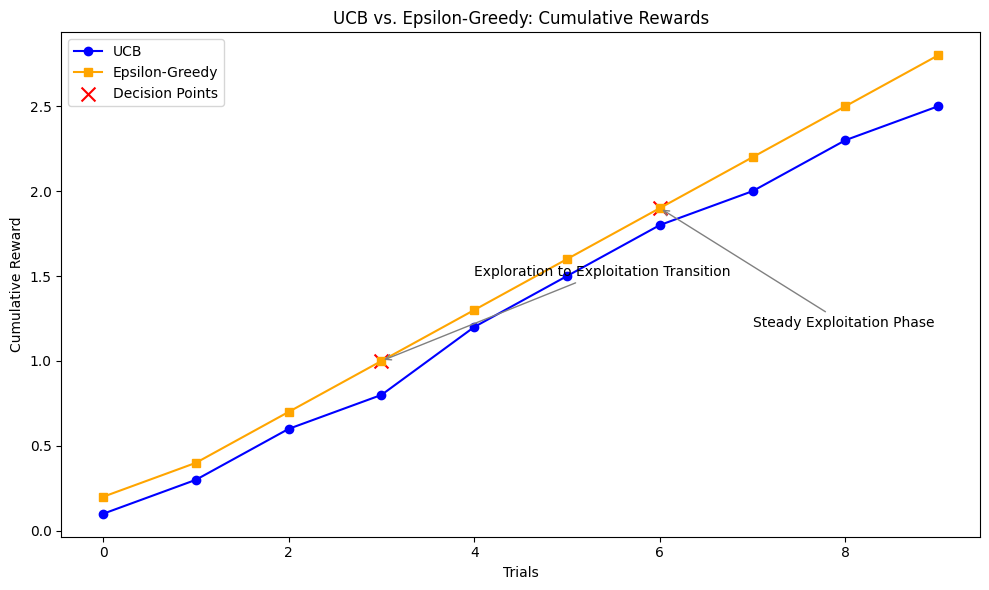

In [64]:
import matplotlib.pyplot as plt

ucb_rewards = [0.1, 0.3, 0.6, 0.8, 1.2, 1.5, 1.8, 2.0, 2.3, 2.5]  # UCB
epsilon_rewards = [0.2, 0.4, 0.7, 1.0, 1.3, 1.6, 1.9, 2.2, 2.5, 2.8]  # Epsilon-Greedy

# Plot cumulative rewards
plt.figure(figsize=(10, 6))
plt.plot(ucb_rewards, label="UCB", marker="o", color="blue")
plt.plot(epsilon_rewards, label="Epsilon-Greedy", marker="s", color="orange")

# Highlight key points
plt.scatter([3, 6], [1.0, 1.9], color="red", marker="x", s=100, label="Decision Points")

# Labels and title
plt.xlabel("Trials")
plt.ylabel("Cumulative Reward")
plt.title("UCB vs. Epsilon-Greedy: Cumulative Rewards")
plt.legend()

# Annotate decision points
plt.annotate("Exploration to Exploitation Transition", xy=(3, 1.0), xytext=(4, 1.5),
             arrowprops=dict(arrowstyle="->", color="gray"))

plt.annotate("Steady Exploitation Phase", xy=(6, 1.9), xytext=(7, 1.2),
             arrowprops=dict(arrowstyle="->", color="gray"))

# Show the plot
plt.grid(False)
plt.tight_layout()
plt.show()


## **Step10**

In [65]:
data3 = yf.download(List1, start="2020-03-01", end="2020-04-30")["Adj Close"]
data4 = yf.download(List2, start="2020-03-01", end="2020-04-30")["Adj Close"]
# Return of stocks
df2 = pd.concat([data3, data4], axis=1)
df2 = df.pct_change().dropna()

colname=df2.columns
YData = df2.reset_index().iloc[:, 1:].to_numpy()
YData_dates = pd.to_datetime(df2.reset_index()["Date"], format="%Y-%m-%d")
print(colname)

[*********************100%%**********************]  15 of 15 completed
[*********************100%%**********************]  15 of 15 completed


Index(['AXP', 'BAC', 'BCS', 'C', 'COF', 'GS', 'HSBC', 'JPM', 'KEY', 'MS',
       'PNC', 'PRU', 'SCHW', 'USB', 'WFC', 'APA', 'BBY', 'CMS', 'CSCO', 'DAL',
       'DUK', 'EQIX', 'F', 'GE', 'KR', 'NFLX', 'PFE', 'REGN', 'WMT', 'XOM'],
      dtype='object', name='Ticker')


<Figure size 1000x800 with 0 Axes>

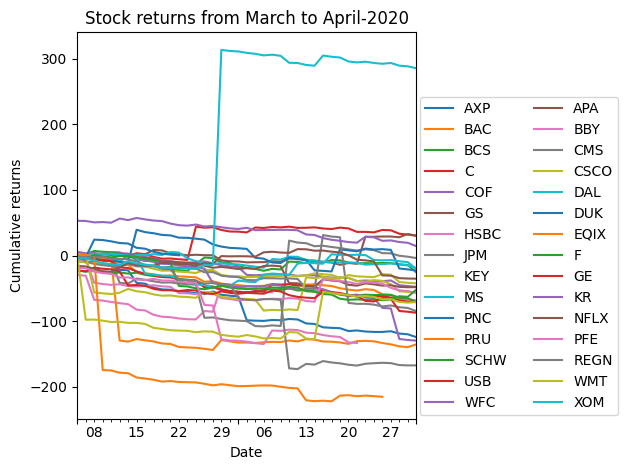

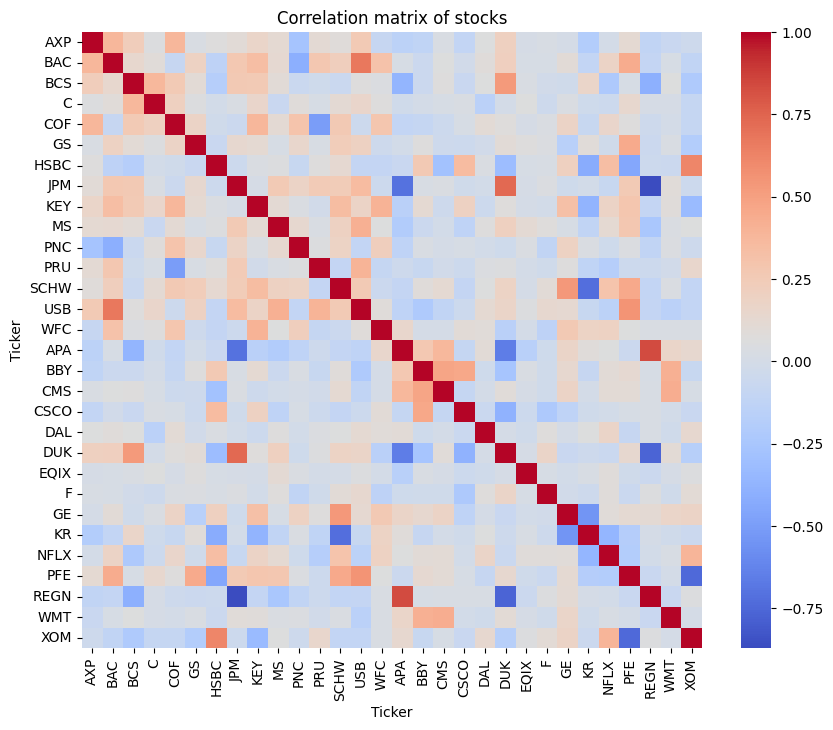

<Figure size 1000x800 with 0 Axes>

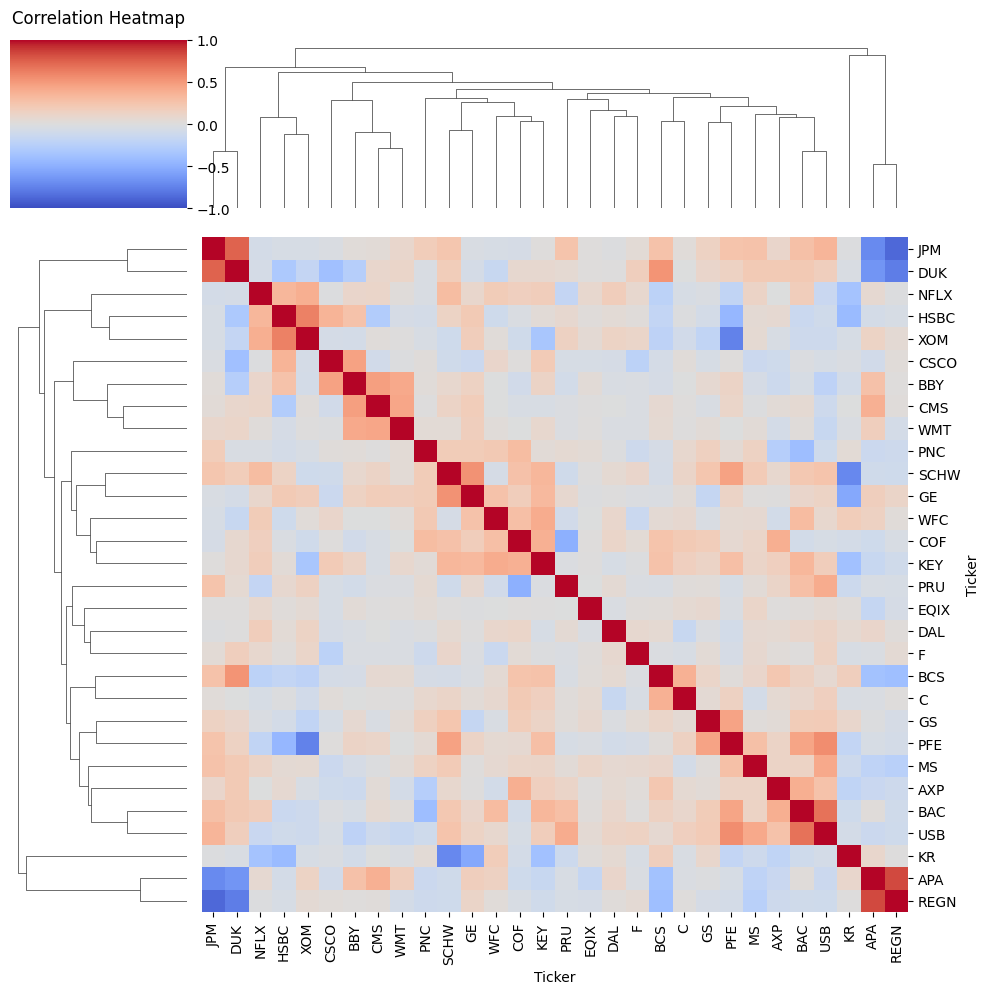

In [66]:
plt.figure(figsize=(10, 8))
df2.cumsum().plot()
plt.title("Stock returns from March to April-2020")
plt.xlabel("Date")
plt.ylabel("Cumulative returns")
plt.xticks(visible=False)
plt.legend(loc=(1.01, 0.01), ncol=2)
plt.tight_layout();

plt.figure(figsize=(10, 8))
sns.heatmap(df2.corr(), cmap="coolwarm")
plt.title("Correlation matrix of stocks");

plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(df2.corr()))
heatmap = sns.heatmap(df2.corr(), mask=mask, vmin=-1, vmax=1, cmap='coolwarm', annot=False)
heatmap.set_title("Correlation Heatmap", fontdict={"fontsize":12}, pad=12);


plt.figure(figsize=(10, 8))
sns.clustermap(df2.corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap", fontdict={"fontsize":12}, pad=12)
plt.tight_layout()

**Step 11**
Implemented in the pdf document

In [68]:
# Colab2PDF v1.0.4 by Drengskapur (github.com/drengskapur/colab2pdf) (License: GPL-3.0-or-later)
# @title {display-mode:"form"}
# @markdown ⬇️ Download PDF
def colab2pdf():
    ENABLE=True # @param {type:"boolean"}
    if ENABLE:
        !apt-get install librsvg2-bin
        import os, datetime, json, locale, pathlib, urllib, requests, werkzeug, nbformat, google, yaml, warnings
        locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
        NAME = pathlib.Path(werkzeug.utils.secure_filename(urllib.parse.unquote(requests.get(f"http://{os.environ['COLAB_JUPYTER_IP']}:{os.environ['KMP_TARGET_PORT']}/api/sessions").json()[0]["name"])))
        TEMP = pathlib.Path("/content/pdfs") / f"{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}_{NAME.stem}"; TEMP.mkdir(parents=True, exist_ok=True)
        NB = [cell for cell in nbformat.reads(json.dumps(google.colab._message.blocking_request("get_ipynb", timeout_sec=600)["ipynb"]), as_version=4).cells if "--Colab2PDF" not in cell.source]
        warnings.filterwarnings('ignore', category=nbformat.validator.MissingIDFieldWarning)
        with (TEMP / f"{NAME.stem}.ipynb").open("w", encoding="utf-8") as nb_copy: nbformat.write(nbformat.v4.new_notebook(cells=NB or [nbformat.v4.new_code_cell("#")]), nb_copy)
        if not pathlib.Path("/usr/local/bin/quarto").exists():
            !wget -q "https://quarto.org/download/latest/quarto-linux-amd64.deb" -P {TEMP} && dpkg -i {TEMP}/quarto-linux-amd64.deb > /dev/null && quarto install tinytex --update-path --quiet
        with (TEMP / "config.yml").open("w", encoding="utf-8") as file: yaml.dump({'include-in-header': [{"text": r"\usepackage{fvextra}\DefineVerbatimEnvironment{Highlighting}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines,breakanywhere,commandchars=\\\{\}}"}],'include-before-body': [{"text": r"\DefineVerbatimEnvironment{verbatim}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines}"}]}, file)
        !quarto render {TEMP}/{NAME.stem}.ipynb --metadata-file={TEMP}/config.yml --to pdf -M latex-auto-install -M margin-top=1in -M margin-bottom=1in -M margin-left=1in -M margin-right=1in --quiet
        google.colab.files.download(str(TEMP / f"{NAME.stem}.pdf"))
colab2pdf()

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
librsvg2-bin is already the newest version (2.52.5+dfsg-3ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>